### Part 1: Build the model in TensorFlow 1

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from time import time
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
def timebar(epoch,train_epochs):    
    scale=100
    if(epoch==0):
        print("start model training".center(scale//2,"-"))
    else:
        position=(epoch/train_epochs)*100
        starmark='*'*int(position)
        pointmark='.'*int(scale-position)
        print("\r{:^3.0f}%[{}->{}]".format(position,starmark,pointmark)) 

In [3]:
model_ckpt_dir='./model_ckpt/'
os.makedirs(model_ckpt_dir) if not os.path.exists(model_ckpt_dir) else None

In [4]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_images=train_images.reshape(-1,784)
train_labels=pd.get_dummies(train_labels)
test_images=test_images.reshape(-1,784)
test_labels=pd.get_dummies(test_labels)

In [5]:
x=tf.placeholder(tf.float32,[None,784],name='X')
y=tf.placeholder(tf.float32,[None,10],name='Y')

w1=tf.Variable(tf.truncated_normal([784,256],stddev=0.1))
b1=tf.Variable(tf.zeros([256]))
w2=tf.Variable(tf.truncated_normal([256,64],stddev=0.1))
b2=tf.Variable(tf.zeros([64]))
w3=tf.Variable(tf.truncated_normal([64,10],stddev=0.1))
b3=tf.Variable(tf.zeros([10]))

y1=tf.nn.relu(tf.matmul(x,w1)+b1)
y2=tf.nn.relu(tf.matmul(y1,w2)+b2)
pred=tf.nn.softmax(tf.matmul(y2,w3)+b3)

In [7]:
learning_rate=0.001
loss_function=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=(tf.matmul(y2,w3)+b3),labels=y))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss_function)
correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(pred,1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [7]:
epoch_list=[]
loss_list=[]
acc_list=[]

saver=tf.train.Saver()
startTime=time()
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
model_restore=tf.train.get_checkpoint_state(model_ckpt_dir)
if model_restore and model_restore.model_checkpoint_path:
    saver.restore(sess,model_restore.model_checkpoint_path)
    print('restore the model from: ',model_restore.model_checkpoint_path)
else:
    train_epochs=10
    batch_size=50
    train_label_row_num,train_label_column_num=train_labels.shape
    total_batch=int(train_label_row_num/batch_size)
    display_step=1
    for epoch in range(train_epochs):
        for batch in range(total_batch):
            xs=train_images[batch*batch_size:(1+batch)*batch_size]
            ys=train_labels[batch*batch_size:(1+batch)*batch_size]
            sess.run(optimizer,feed_dict={x:xs,y:ys})
        loss,acc=sess.run([loss_function,accuracy],feed_dict={x:test_images,y:test_labels})
        timebar(epoch,train_epochs)
        if(epoch+1)%display_step==0:
            print('train epochs: {:02d},'.format(epoch+1),'loss= {:.9f},'.format(loss),'accuracy= {:.4f}'.format(acc))
            epoch_list.append(epoch)
            loss_list.append(loss)
            acc_list.append(acc)
    saver.save(sess,os.path.join(model_ckpt_dir,'mnist_model.ckpt'))
    print('trained model has been saved to: ',model_ckpt_dir)
    print('train finished take: {:.3f}'.format(time()-startTime))

---------------start model training---------------
train epochs: 01, loss= 0.520063400, accuracy= 0.8753
10 %[**********->..........................................................................................]
train epochs: 02, loss= 0.343766004, accuracy= 0.9128
20 %[********************->................................................................................]
train epochs: 03, loss= 0.263447911, accuracy= 0.9339
30 %[******************************->......................................................................]
train epochs: 04, loss= 0.238694504, accuracy= 0.9423
40 %[****************************************->............................................................]
train epochs: 05, loss= 0.191083744, accuracy= 0.9553
50 %[**************************************************->..................................................]
train epochs: 06, loss= 0.224500999, accuracy= 0.9444
60 %[************************************************************->.............

In [9]:
accu_test=sess.run(accuracy,feed_dict={x:test_images,y:test_labels})
print('test accuracy:',accu_test)
prediction_result=sess.run(tf.argmax(pred,1),feed_dict={x:test_images})
test_labels_ndarray=np.asarray(test_labels).reshape(-1,10)

def print_predict_err(true_label,model_prediction):
    count=0
    compare_list=prediction_result==np.argmax(test_labels_ndarray,1)
    wrong_predict_index=[i for i in range(len(compare_list)) if compare_list[i]==False]
    for i in wrong_predict_index:
        print('index=',str(i),',label value=',np.argmax(true_label[i]),',predict value=',model_prediction[i])
        count=count+1
    print('total error amount:',str(count))

print_predict_err(test_labels_ndarray,prediction_result)

test accuracy: 0.9648
index= 149 ,label value= 2 ,predict value= 3
index= 151 ,label value= 9 ,predict value= 8
index= 217 ,label value= 6 ,predict value= 5
index= 247 ,label value= 4 ,predict value= 2
index= 359 ,label value= 9 ,predict value= 4
index= 403 ,label value= 8 ,predict value= 5
index= 448 ,label value= 9 ,predict value= 3
index= 495 ,label value= 8 ,predict value= 6
index= 507 ,label value= 3 ,predict value= 5
index= 508 ,label value= 6 ,predict value= 5
index= 530 ,label value= 9 ,predict value= 4
index= 542 ,label value= 8 ,predict value= 5
index= 551 ,label value= 7 ,predict value= 3
index= 582 ,label value= 8 ,predict value= 2
index= 619 ,label value= 1 ,predict value= 8
index= 659 ,label value= 2 ,predict value= 3
index= 717 ,label value= 0 ,predict value= 6
index= 726 ,label value= 7 ,predict value= 9
index= 844 ,label value= 8 ,predict value= 7
index= 870 ,label value= 6 ,predict value= 5
index= 874 ,label value= 9 ,predict value= 4
index= 877 ,label value= 8 ,predi

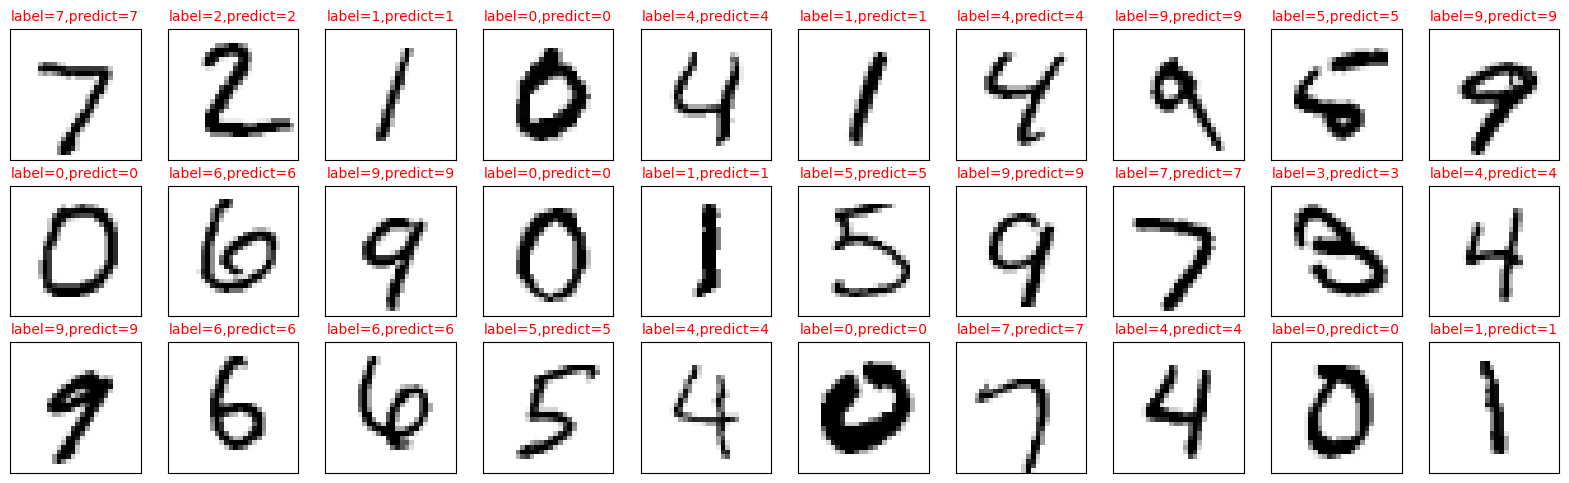

In [10]:
def plot_images_labels_prediction(images,labels,prediction,index,num=10):
    fig=plt.gcf()
    fig.set_size_inches(20,20)
    if num>100:num=100
    for i in range(0,num):
        ax=plt.subplot(10,10,i+1)
        ax.imshow(np.reshape(images[index],(28,28)),cmap='binary')
        title='label='+str(np.argmax(labels[index]))
        if len(prediction)>0:
            title+=',predict='+str(prediction[index])
        ax.set_title(title,fontsize=10,color='red')
        ax.set_xticks([])
        ax.set_yticks([])
        index+=1
    plt.show()

plot_images_labels_prediction(test_images,test_labels_ndarray,prediction_result,0,30)

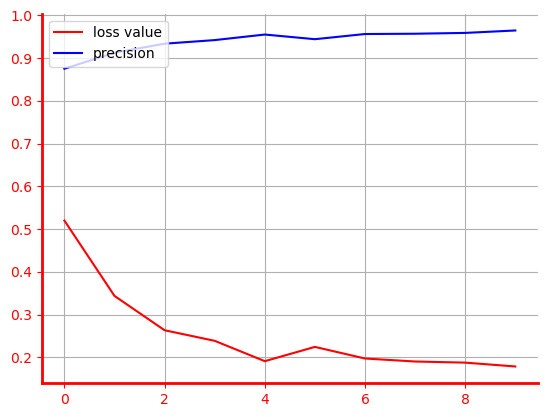

In [11]:
def plot_acc_and_loss(epoch_list,loss_list,acc_list):
    fig=plt.figure()
    ax=fig.gca()
    ax.spines['left'].set_color('red')
    ax.spines['left'].set_linewidth(2)
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('red')
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(axis='y',colors='red');ax.tick_params(axis='x',colors='red')
    plt.plot(epoch_list,loss_list,label='loss value',color='red')
    plt.plot(epoch_list,acc_list,label='precision',color='blue')
    plt.legend(loc=2)
    plt.grid(True)

plot_acc_and_loss(epoch_list,loss_list,acc_list)

### Part 2: Build the same model but in TensorFlow 2

In [1]:
import sys
sys.exit("The previous part of code finished execution. To run the following code, please 'Restart' and 'Run All' manually.")

NameError: name 'sys' is not defined

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [3]:
mnist=tf.keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

train_labels=tf.one_hot(train_labels,depth=10).numpy()
test_labels=tf.one_hot(test_labels,depth=10).numpy()

train_images=train_images/255.0
test_images=test_images/255.0

In [4]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=32,kernel_initializer='normal',activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [5]:
train_epochs=10
batch_size=50
model_history=model.fit(train_images,train_labels,validation_split=0.2,epochs=train_epochs,batch_size=batch_size,verbose=2)

Epoch 1/10
960/960 - 2s - loss: 0.4084 - accuracy: 0.8864 - val_loss: 0.2038 - val_accuracy: 0.9416 - 2s/epoch - 2ms/step
Epoch 2/10
960/960 - 1s - loss: 0.1798 - accuracy: 0.9472 - val_loss: 0.1531 - val_accuracy: 0.9557 - 894ms/epoch - 931us/step
Epoch 3/10
960/960 - 1s - loss: 0.1320 - accuracy: 0.9617 - val_loss: 0.1286 - val_accuracy: 0.9622 - 878ms/epoch - 914us/step
Epoch 4/10
960/960 - 1s - loss: 0.1058 - accuracy: 0.9684 - val_loss: 0.1179 - val_accuracy: 0.9653 - 885ms/epoch - 922us/step
Epoch 5/10
960/960 - 1s - loss: 0.0867 - accuracy: 0.9734 - val_loss: 0.1122 - val_accuracy: 0.9693 - 881ms/epoch - 918us/step
Epoch 6/10
960/960 - 1s - loss: 0.0742 - accuracy: 0.9777 - val_loss: 0.1104 - val_accuracy: 0.9678 - 889ms/epoch - 926us/step
Epoch 7/10
960/960 - 1s - loss: 0.0626 - accuracy: 0.9811 - val_loss: 0.1226 - val_accuracy: 0.9662 - 906ms/epoch - 944us/step
Epoch 8/10
960/960 - 1s - loss: 0.0552 - accuracy: 0.9830 - val_loss: 0.1053 - val_accuracy: 0.9706 - 929ms/epoch - 

In [6]:
model_history.history

{'loss': [0.408385306596756,
  0.17978906631469727,
  0.1320229023694992,
  0.10576701909303665,
  0.08671792596578598,
  0.07416670769453049,
  0.06262587755918503,
  0.05516956001520157,
  0.047798074781894684,
  0.04137137532234192],
 'accuracy': [0.8864166736602783,
  0.9472083449363708,
  0.9616666436195374,
  0.968416690826416,
  0.9733750224113464,
  0.9776666760444641,
  0.981124997138977,
  0.9830208420753479,
  0.9851041436195374,
  0.9878125190734863],
 'val_loss': [0.20382463932037354,
  0.15313972532749176,
  0.1286330372095108,
  0.11788163334131241,
  0.11222322285175323,
  0.1104409247636795,
  0.12259935587644577,
  0.10526549071073532,
  0.10989422351121902,
  0.11147051304578781],
 'val_accuracy': [0.9415833353996277,
  0.9556666612625122,
  0.9622499942779541,
  0.9653333425521851,
  0.9692500233650208,
  0.9677500128746033,
  0.9661666750907898,
  0.9705833196640015,
  0.972000002861023,
  0.9706666469573975]}

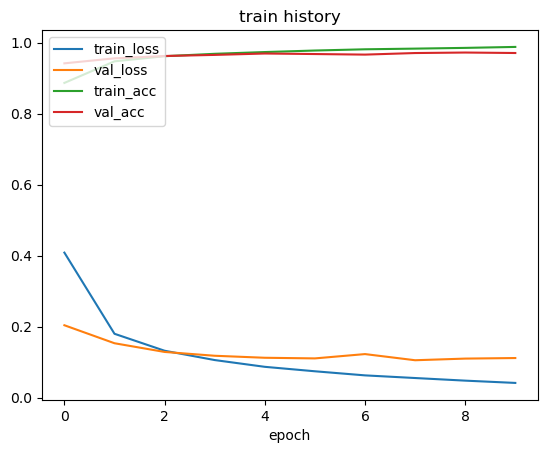

In [7]:
def show_train_history(model_history,train_loss,val_loss,train_acc,val_acc):
    plt.plot(model_history.history[train_loss])
    plt.plot(model_history.history[val_loss])
    plt.plot(model_history.history[train_acc])
    plt.plot(model_history.history[val_acc])
    plt.title('train history')
    plt.xlabel('epoch')
    plt.legend(['train_loss','val_loss','train_acc','val_acc'],loc='upper left')
    plt.show()

show_train_history(model_history,'loss','val_loss','accuracy','val_accuracy')

In [8]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
test_pred=model.predict(test_images)
test_pred.shape

313/313 - 0s - loss: 0.1036 - accuracy: 0.9698 - 303ms/epoch - 967us/step
313/313 [==============================] - 0s 503us/step


(10000, 10)